### What factors made people more likely to survive the sinking of titanic?

In [96]:
### Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [97]:
### import dataset
titanic_data = pd.read_csv('/Users/salma/Studies/MachineLearning/ml_edureka/datasets/titanic.csv')

print(titanic_data.shape)
titanic_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [98]:
print("# of passengers in original data: " +str(len(titanic_data.index)))

# of passengers in original data: 891


## Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

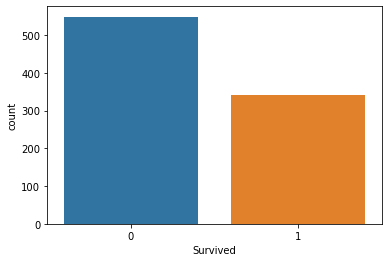

In [99]:
### Count plot - survived vs not survived
sns.countplot(x="Survived", data = titanic_data) # 0 - didn't survive; 1 - survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

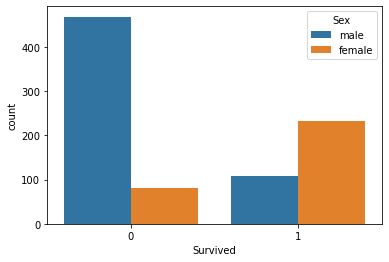

In [100]:
### Survival count by gender
sns.countplot(x = "Survived", hue = "Sex", data = titanic_data)

# Appears that on an average women were 3 times more likely to survive than men

<AxesSubplot:xlabel='Survived', ylabel='count'>

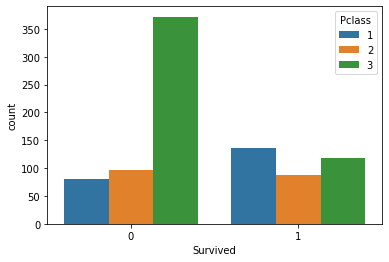

In [101]:
### Survival count by passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
# Passengers who didn't survive more were from the 3rd class and passengers from 1st and 2nd class survived the most

<AxesSubplot:ylabel='Frequency'>

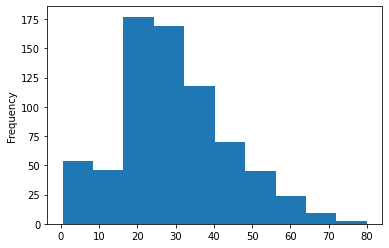

In [102]:
### Age distribution of passengers
titanic_data["Age"].plot.hist()
# More young and younger people were traveling

<AxesSubplot:ylabel='Frequency'>

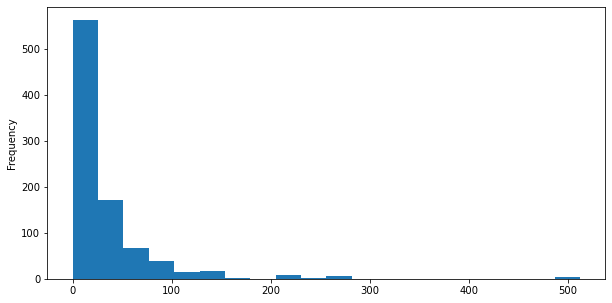

In [103]:
### Fare distribution
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

In [104]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

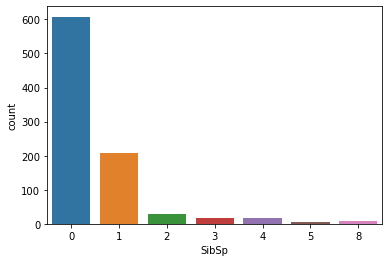

In [105]:
sns.countplot(x='SibSp', data=titanic_data)

## Data Wrangling / Data Cleaning

In [106]:
### Check for all the null values
titanic_data.isnull() # checks for missing data and returns boolean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [107]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

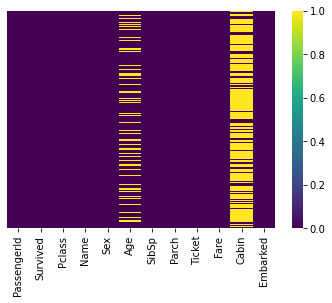

In [108]:
### Heatmap to visually analyze null values
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

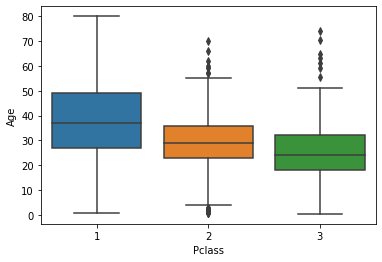

In [109]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)
# Age in the 1st and 2nd class tend to be older than the 3rd class - experience? more income?

In [110]:
### Can either drop the null values or replace - data imputation
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [111]:
### Cabin has more NaN values and it is visible too - drop cabin
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S


In [112]:
## Next drop all na
titanic_data.dropna(inplace=True)

<AxesSubplot:>

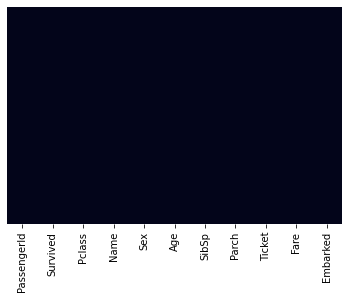

In [113]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [114]:
titanic_data.isnull().sum()
# data set is clean - no null or missing values - we have wrangled data!

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [115]:
titanic_data.head(2)
# Lot of string values - need to be converted to categorical values to run logistic regression

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C


In [116]:
### Convert categorical to dummy coz log reg takes only 2 values
### When applying ML algos need to be careful to not have any string values as they wont be taken as inputs
# Using name strings dont have to predict anything
# convert only those which are important for analysis

In [117]:
# Convert sex to dummy vars
gender = pd.get_dummies(titanic_data['Sex'], drop_first=True)
# 1 --> female; 0 --> male
# can drop one column since just one column either m or f gives info about gender of a particular person

gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [118]:
# embark = pd.get_dummies(titanic_data["Embarked"])
"""
    C	Q	S
0	0	0	1
1	1	0	0
2	0	0	1
3	0	0	1
4	0	0	1

Again, only 3 columns are enough since if 2 are 0 we know it should be the 3rd
"""
embark = pd.get_dummies(titanic_data["Embarked"], drop_first = True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [119]:
# Similarly for Pclass - reduce 3 to 2

pcl = pd.get_dummies(titanic_data['Pclass'], drop_first=True)
pcl.head()
# If both the values are 0, then definitely the passenger traveled in the 1st class

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [120]:
# Concatenate all the new columns into a dataset 
titanic_data = pd.concat([titanic_data, gender, embark, pcl], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S,1,0,1,0,1


In [121]:
# Drop irrelevant columns now
titanic_data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [122]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.250,1,0,1,0,1
1,1,1,38.0,1,0,71.283,0,0,0,0,0
2,1,3,26.0,0,0,7.925,0,0,1,0,1
3,1,1,35.0,1,0,53.100,0,0,1,0,0
4,0,3,35.0,0,0,8.050,1,0,1,0,1


In [123]:
titanic_data.drop(['Pclass'], axis=1, inplace=True)

In [124]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.250,1,0,1,0,1
1,1,38.0,1,0,71.283,0,0,0,0,0
2,1,26.0,0,0,7.925,0,0,1,0,1
3,1,35.0,1,0,53.100,0,0,1,0,0
4,0,35.0,0,0,8.050,1,0,1,0,1


In [126]:
titanic_data.rename({2: "SecCls", 3: "ThirdCls"}, axis=1, inplace=True)
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,SecCls,ThirdCls
0,0,22.0,1,0,7.250,1,0,1,0,1
1,1,38.0,1,0,71.283,0,0,0,0,0
2,1,26.0,0,0,7.925,0,0,1,0,1
3,1,35.0,1,0,53.100,0,0,1,0,0
4,0,35.0,0,0,8.050,1,0,1,0,1


### Train Data

In [127]:
# Identify features and target variables
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

print(list(X))

['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 'SecCls', 'ThirdCls']


In [128]:
import sklearn

In [129]:
# Split into train and test
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
logmodel = LogisticRegression(max_iter=400)

In [133]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [134]:
predictions = logmodel.predict(X_test)

In [135]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       126
           1       0.72      0.72      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [138]:
from sklearn.metrics import confusion_matrix

In [139]:
confusion_matrix(y_test, predictions)

array([[102,  24],
       [ 25,  63]])

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(y_test, predictions)

0.7710280373831776